# Session duration data - additional calculations

### Loading data and formatting dtypes

In [2]:
import pandas as pd

In [3]:
path = 'sessions_data_sql_results.csv'

# Custom parser function for session_start and session_end columns
def custom_parser_func(x):
    try:
        return pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S.%f UTC')
    except ValueError:
        # If microseconds are not present, try parsing without microseconds
        return pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S UTC')
    
# Read CSV with parsing dates
df = pd.read_csv(path, parse_dates=['session_start', 'session_end'],
                 date_parser=custom_parser_func)

C:\Users\patry\AppData\Local\Temp\ipykernel_5524\2156779092.py:12: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(path, parse_dates=['session_start', 'session_end'],


In [4]:
df.head()

,session_id,session_start,session_end,session_duration,session_date,weekday,campaign_name,campaign,category,country,user_pseudo_id,purchase_flag,purchase_revenue,bounce_5_flag,bounce_60_flag,user_engagement_segment
0,10001363.4360935308_desktop_0,2020-12-12 04:11:17.508078,2020-12-12 04:11:32.809866,15,2020-12-12 00:00:00 UTC,Saturday,(organic),no_campaign,desktop,Sweden,1.000136e+07,0,NaN,0,1,up_to_1_MIN
1,1000223163.8035209215_mobile_0,2021-01-07 18:35:34.089387,2021-01-07 18:35:44.561794,10,2021-01-07 00:00:00 UTC,Thursday,(direct),no_campaign,mobile,Australia,1.000223e+09,0,NaN,0,1,up_to_1_MIN
2,1000299.7413851356_desktop_0,2021-01-20 11:04:59.887247,2021-01-20 11:05:05.779925,5,2021-01-20 00:00:00 UTC,Wednesday,(direct),no_campaign,desktop,India,1.000300e+06,0,NaN,1,1,up_to_5_SEC
3,1000300.3223254235_desktop_0,2020-11-04 09:21:11.657014,2020-11-04 09:21:18.760672,7,2020-11-04 00:00:00 UTC,Wednesday,<Other>,no_campaign,desktop,France,1.000300e+06,0,NaN,0,1,up_to_1_MIN
4,1000300.3223254235_desktop_1,2020-11-04 13:43:30.570448,2020-11-04 13:43:30.570448,0,2020-11-04 00:00:00 UTC,Wednesday,(referral),no_campaign,desktop,France,1.000300e+06,0,NaN,1,1,up_to_5_SEC


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355597 entries, 0 to 355596
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   session_id               355597 non-null  object        
 1   session_start            355597 non-null  datetime64[ns]
 2   session_end              355597 non-null  datetime64[ns]
 3   session_duration         355597 non-null  int64         
 4   session_date             355597 non-null  object        
 5   weekday                  355597 non-null  object        
 6   campaign_name            262076 non-null  object        
 7   campaign                 355597 non-null  object        
 8   category                 355597 non-null  object        
 9   country                  355597 non-null  object        
 10  user_pseudo_id           355597 non-null  float64       
 11  purchase_flag            355597 non-null  int64         
 12  purchase_revenue

In [6]:
# formatting session_date into YYYY-MM-DD format
df['session_date'] = pd.to_datetime(df['session_date'])

#formatting pseudo_user)id into string
df['user_pseudo_id'] =df['user_pseudo_id'].astype(str)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355597 entries, 0 to 355596
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype              
---  ------                   --------------   -----              
 0   session_id               355597 non-null  object             
 1   session_start            355597 non-null  datetime64[ns]     
 2   session_end              355597 non-null  datetime64[ns]     
 3   session_duration         355597 non-null  int64              
 4   session_date             355597 non-null  datetime64[ns, UTC]
 5   weekday                  355597 non-null  object             
 6   campaign_name            262076 non-null  object             
 7   campaign                 355597 non-null  object             
 8   category                 355597 non-null  object             
 9   country                  355597 non-null  object             
 10  user_pseudo_id           355597 non-null  object             
 11  purchase_flag

In [8]:
df.head()

,session_id,session_start,session_end,session_duration,session_date,weekday,campaign_name,campaign,category,country,user_pseudo_id,purchase_flag,purchase_revenue,bounce_5_flag,bounce_60_flag,user_engagement_segment
0,10001363.4360935308_desktop_0,2020-12-12 04:11:17.508078,2020-12-12 04:11:32.809866,15,2020-12-12 00:00:00+00:00,Saturday,(organic),no_campaign,desktop,Sweden,10001363.43609353,0,NaN,0,1,up_to_1_MIN
1,1000223163.8035209215_mobile_0,2021-01-07 18:35:34.089387,2021-01-07 18:35:44.561794,10,2021-01-07 00:00:00+00:00,Thursday,(direct),no_campaign,mobile,Australia,1000223163.8035208,0,NaN,0,1,up_to_1_MIN
2,1000299.7413851356_desktop_0,2021-01-20 11:04:59.887247,2021-01-20 11:05:05.779925,5,2021-01-20 00:00:00+00:00,Wednesday,(direct),no_campaign,desktop,India,1000299.7413851356,0,NaN,1,1,up_to_5_SEC
3,1000300.3223254235_desktop_0,2020-11-04 09:21:11.657014,2020-11-04 09:21:18.760672,7,2020-11-04 00:00:00+00:00,Wednesday,<Other>,no_campaign,desktop,France,1000300.3223254236,0,NaN,0,1,up_to_1_MIN
4,1000300.3223254235_desktop_1,2020-11-04 13:43:30.570448,2020-11-04 13:43:30.570448,0,2020-11-04 00:00:00+00:00,Wednesday,(referral),no_campaign,desktop,France,1000300.3223254236,0,NaN,1,1,up_to_5_SEC


### Creating duration column as timedelta (HH:MM:SS)

In [9]:
# Create a new column representing the duration in HH:MM:SS format
df['duration_HH:MM:SS'] = df['session_end'] - df['session_start']

df['duration_HH:MM:SS'] = df['duration_HH:MM:SS'].apply(lambda x: str(x).split()[-1])
df['duration_HH:MM:SS'] = df['duration_HH:MM:SS'].apply(lambda x: x.split('.')[0])

df['duration_HH:MM:SS'] = pd.to_timedelta(df['duration_HH:MM:SS'])

df.rename(columns={'session_duration': 'duration_SECONDS'}, inplace=True)

df.head()

,session_id,session_start,session_end,duration_SECONDS,session_date,weekday,campaign_name,campaign,category,country,user_pseudo_id,purchase_flag,purchase_revenue,bounce_5_flag,bounce_60_flag,user_engagement_segment,duration_HH:MM:SS
0,10001363.4360935308_desktop_0,2020-12-12 04:11:17.508078,2020-12-12 04:11:32.809866,15,2020-12-12 00:00:00+00:00,Saturday,(organic),no_campaign,desktop,Sweden,10001363.43609353,0,NaN,0,1,up_to_1_MIN,0 days 00:00:15
1,1000223163.8035209215_mobile_0,2021-01-07 18:35:34.089387,2021-01-07 18:35:44.561794,10,2021-01-07 00:00:00+00:00,Thursday,(direct),no_campaign,mobile,Australia,1000223163.8035208,0,NaN,0,1,up_to_1_MIN,0 days 00:00:10
2,1000299.7413851356_desktop_0,2021-01-20 11:04:59.887247,2021-01-20 11:05:05.779925,5,2021-01-20 00:00:00+00:00,Wednesday,(direct),no_campaign,desktop,India,1000299.7413851356,0,NaN,1,1,up_to_5_SEC,0 days 00:00:05
3,1000300.3223254235_desktop_0,2020-11-04 09:21:11.657014,2020-11-04 09:21:18.760672,7,2020-11-04 00:00:00+00:00,Wednesday,<Other>,no_campaign,desktop,France,1000300.3223254236,0,NaN,0,1,up_to_1_MIN,0 days 00:00:07
4,1000300.3223254235_desktop_1,2020-11-04 13:43:30.570448,2020-11-04 13:43:30.570448,0,2020-11-04 00:00:00+00:00,Wednesday,(referral),no_campaign,desktop,France,1000300.3223254236,0,NaN,1,1,up_to_5_SEC,0 days 00:00:00


In [15]:
df['duration_HH:MM:SS'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 355597 entries, 0 to 355596
Series name: duration_HH:MM:SS
Non-Null Count   Dtype          
--------------   -----          
355597 non-null  timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 2.7 MB


### Session duration by Campaign

In [22]:
campaign = df.groupby(['campaign']).agg({'duration_SECONDS': ['mean', 'median', min, max], 
                                         'duration_HH:MM:SS': ['mean', 'median', max, min]})
campaign.columns = campaign.columns.map('_'.join)
campaign = campaign.reset_index()

campaign

,campaign,duration_SECONDS_mean,duration_SECONDS_median,duration_SECONDS_min,duration_SECONDS_max,duration_HH:MM:SS_mean,duration_HH:MM:SS_median,duration_HH:MM:SS_max,duration_HH:MM:SS_min
0,BlackFriday_V1,796.444444,400.0,6,2727,0 days 00:13:16.444444444,0 days 00:06:40,0 days 00:45:27,0 days 00:00:06
1,BlackFriday_V2,947.480000,510.0,0,6386,0 days 00:15:47.480000,0 days 00:08:30,0 days 01:46:26,0 days 00:00:00
2,Data Share Promo,457.561644,71.0,0,8963,0 days 00:07:37.561643835,0 days 00:01:11,0 days 02:29:23,0 days 00:00:00
3,Holiday_V1,686.368421,151.0,0,3234,0 days 00:11:26.368421052,0 days 00:02:31,0 days 00:53:54,0 days 00:00:00
4,Holiday_V2,386.972973,225.0,0,1665,0 days 00:06:26.972972972,0 days 00:03:45,0 days 00:27:45,0 days 00:00:00
5,NewYear_V1,262.791045,75.0,0,2220,0 days 00:04:22.791044776,0 days 00:01:15,0 days 00:37:00,0 days 00:00:00
6,NewYear_V2,278.205128,67.0,5,1987,0 days 00:04:38.205128205,0 days 00:01:07,0 days 00:33:07,0 days 00:00:05
7,no_campaign,211.059496,14.0,0,18064,0 days 00:03:31.059495791,0 days 00:00:14,0 days 05:01:04,0 days 00:00:00


### Session duration by segments based on user engagement

In [23]:
segments = df.groupby(['user_engagement_segment', 'category']).agg({'session_id': 'count', 'duration_SECONDS': ['min', 'max', 'median', 'mean'], 
                                                                    'duration_HH:MM:SS':['min', 'max', 'median', 'mean'],})
segments.columns = segments.columns.map('_'.join)
segments = segments.reset_index()
segments = segments.sort_values(by='session_id_count', ascending=False)
segments

,user_engagement_segment,category,session_id_count,duration_SECONDS_min,duration_SECONDS_max,duration_SECONDS_median,duration_SECONDS_mean,duration_HH:MM:SS_min,duration_HH:MM:SS_max,duration_HH:MM:SS_median,duration_HH:MM:SS_mean
15,up_to_5_SEC,desktop,75499,0,5,2.0,2.068054,0 days 00:00:00,0 days 00:00:05,0 days 00:00:02,0 days 00:00:02.068053881
6,up_to_1_MIN,desktop,64830,6,60,17.0,21.440629,0 days 00:00:06,0 days 00:01:00,0 days 00:00:17,0 days 00:00:21.440629338
16,up_to_5_SEC,mobile,51632,0,5,2.0,2.061047,0 days 00:00:00,0 days 00:00:05,0 days 00:00:02,0 days 00:00:02.061047412
7,up_to_1_MIN,mobile,44389,6,60,17.0,21.378360,0 days 00:00:06,0 days 00:01:00,0 days 00:00:17,0 days 00:00:21.378359503
12,up_to_5_MIN,desktop,32122,61,300,127.0,143.906419,0 days 00:01:01,0 days 00:05:00,0 days 00:02:07,0 days 00:02:23.906419276
13,up_to_5_MIN,mobile,22214,61,300,128.0,144.750698,0 days 00:01:01,0 days 00:05:00,0 days 00:02:08,0 days 00:02:24.750697758
3,up_to_15_MIN,desktop,17808,301,900,511.0,539.621406,0 days 00:05:01,0 days 00:15:00,0 days 00:08:31,0 days 00:08:59.621406109
4,up_to_15_MIN,mobile,12145,301,900,515.0,540.635076,0 days 00:05:01,0 days 00:15:00,0 days 00:08:35,0 days 00:09:00.635076163
9,up_to_30_MIN,desktop,11324,901,1800,1270.0,1301.133787,0 days 00:15:01,0 days 00:30:00,0 days 00:21:10,0 days 00:21:41.133786647
10,up_to_30_MIN,mobile,7640,901,1800,1268.0,1296.501702,0 days 00:15:01,0 days 00:30:00,0 days 00:21:08,0 days 00:21:36.501701570


In [24]:
import plotly.express as px

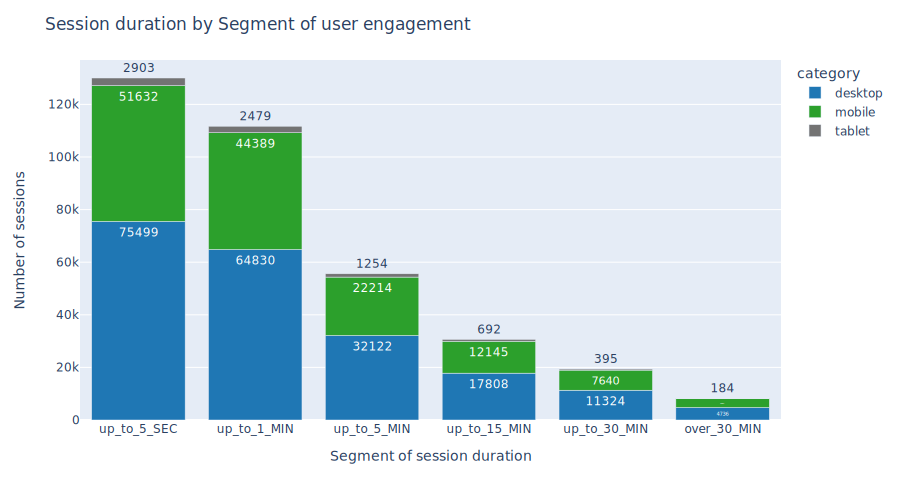

In [25]:
# Define color mapping for each category
color_mapping = {'desktop': '#1f77b4',  # Dark blue
                 'mobile': '#2ca02c',  # Turquoise green
                 'tablet': '#737373'}  # Darker grey

fig = px.bar(segments, y='session_id_count', x='user_engagement_segment', color='category', 
             color_discrete_map=color_mapping, height=800, text='session_id_count',
             labels={'session_id_count': 'Number of sessions', 'user_engagement_segment': 'Segment of session duration'})

fig.update_layout(title='Session duration by Segment of user engagement', height=500, width=900)

fig.show("svg")

Conclusions:

Most of the instances are sessions up to 5 and up to 60 seconds, what coresponds with the skeweness of the data distribution.

### Session duration by weekdays

In [26]:
weekdays = df.groupby(['weekday']).agg({'session_id': 'count', 'duration_SECONDS': ['min', 'max', 'median', 'mean'], 
                                                                    'duration_HH:MM:SS':['min', 'max', 'median', 'mean'],})
weekdays.columns = weekdays.columns.map('_'.join)
weekdays = weekdays.reset_index()
weekdays = weekdays.sort_values(by='session_id_count', ascending=False)
weekdays

,weekday,session_id_count,duration_SECONDS_min,duration_SECONDS_max,duration_SECONDS_median,duration_SECONDS_mean,duration_HH:MM:SS_min,duration_HH:MM:SS_max,duration_HH:MM:SS_median,duration_HH:MM:SS_mean
5,Tuesday,59862,0,10828,15.0,220.449417,0 days,0 days 03:00:28,0 days 00:00:15,0 days 00:03:40.449416992
6,Wednesday,59246,0,17883,15.0,219.086909,0 days,0 days 04:58:03,0 days 00:00:15,0 days 00:03:39.086908820
4,Thursday,55043,0,11727,15.0,219.580165,0 days,0 days 03:15:27,0 days 00:00:15,0 days 00:03:39.580164598
1,Monday,51174,0,12137,15.0,213.304569,0 days,0 days 03:22:17,0 days 00:00:15,0 days 00:03:33.304568726
0,Friday,50280,0,17396,14.0,219.014260,0 days,0 days 04:49:56,0 days 00:00:14,0 days 00:03:39.014260143
3,Sunday,40111,0,10520,12.0,184.520057,0 days,0 days 02:55:20,0 days 00:00:12,0 days 00:03:04.520056842
2,Saturday,39881,0,18064,12.0,197.222587,0 days,0 days 05:01:04,0 days 00:00:12,0 days 00:03:17.222587196


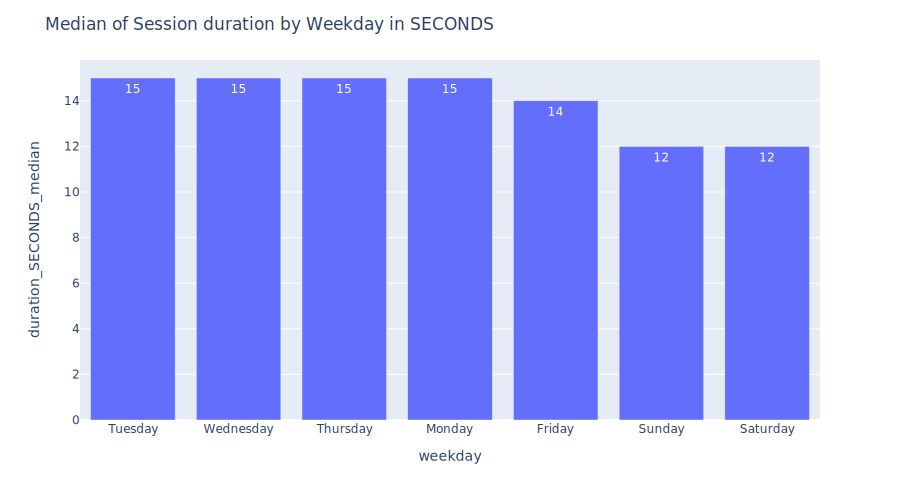

In [27]:
fig = px.bar(weekdays, x='weekday', y='duration_SECONDS_median', 
             color_discrete_map=color_mapping, text='duration_SECONDS_median',)

fig.update_layout(title='Median of Session duration by Weekday in SECONDS', height=500,  width=900)

fig.show("svg")

Conclusions:

Median of session duration across weekdays is comparable, with slightly lower value during weekend.

### Session duration distribution by Countries

In [28]:
countries = df.groupby(['country']).agg({'session_id': 'count', 'duration_SECONDS': ['min', 'max', 'median', 'mean'], 
                                                                    'duration_HH:MM:SS':['min', 'max', 'median', 'mean'],})
countries.columns = countries.columns.map('_'.join)
countries = countries.reset_index()
countries = countries.sort_values(by='session_id_count', ascending=False)
countries

,country,session_id_count,duration_SECONDS_min,duration_SECONDS_max,duration_SECONDS_median,duration_SECONDS_mean,duration_HH:MM:SS_min,duration_HH:MM:SS_max,duration_HH:MM:SS_median,duration_HH:MM:SS_mean
105,United States,156206,0,18064,14.0,214.367828,0 days,0 days 05:01:04,0 days 00:00:14,0 days 00:03:34.367828380
43,India,33310,0,17396,14.0,211.411048,0 days,0 days 04:49:56,0 days 00:00:14,0 days 00:03:31.411047733
18,Canada,26461,0,13231,15.0,210.056801,0 days,0 days 03:40:31,0 days 00:00:15,0 days 00:03:30.056800574
104,United Kingdom,11193,0,10097,14.0,217.706870,0 days,0 days 02:48:17,0 days 00:00:14,0 days 00:03:37.706870365
33,France,7065,0,6767,14.0,201.152017,0 days,0 days 01:52:47,0 days 00:00:14,0 days 00:03:21.152016985
...,...,...,...,...,...,...,...,...,...,...
77,Paraguay,71,0,3662,17.0,264.943662,0 days,0 days 01:01:02,0 days 00:00:17,0 days 00:04:24.943661971
99,Trinidad & Tobago,71,0,1465,11.0,82.802817,0 days,0 days 00:24:25,0 days 00:00:11,0 days 00:01:22.802816901
62,Malta,70,0,3157,26.5,240.928571,0 days,0 days 00:52:37,0 days 00:00:26.500000,0 days 00:04:00.928571428
54,Kosovo,70,0,1379,7.5,113.000000,0 days,0 days 00:22:59,0 days 00:00:07.500000,0 days 00:01:53


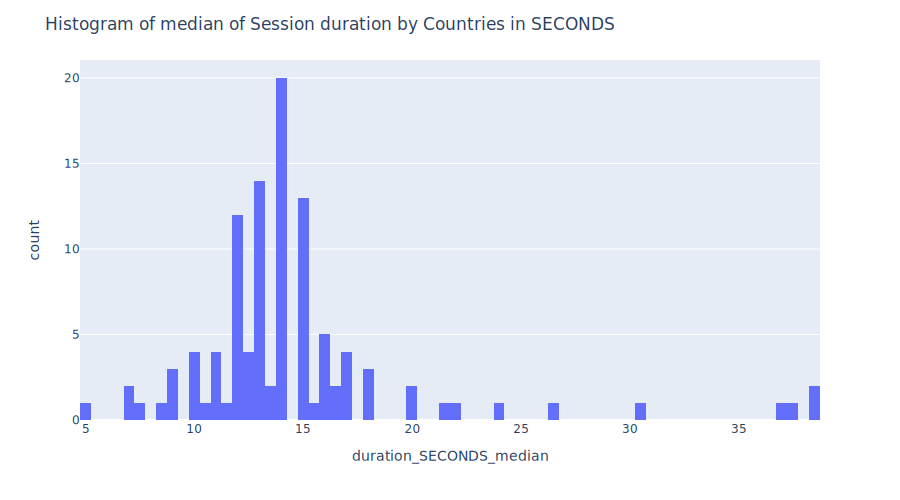

In [29]:
fig = px.histogram(countries, x='duration_SECONDS_median',
             color_discrete_map=color_mapping, height=400, nbins=100)

fig.update_layout(title='Histogram of median of Session duration by Countries in SECONDS', height=500,  width=900)

fig.show("svg")

Conclusions:

Histogram of median of session duration in each country represents in general normal distribution around median of session duration for the entire dataset.

### Session duration by Category

In [30]:
category = df.groupby(['category']).agg({'session_id': 'count', 'duration_SECONDS': ['min', 'max', 'median', 'mean'], 
                                                                    'duration_HH:MM:SS':['min', 'max', 'median', 'mean'],})
category.columns = category.columns.map('_'.join)
category = category.reset_index()
category = category.sort_values(by='session_id_count', ascending=False)
category

,category,session_id_count,duration_SECONDS_min,duration_SECONDS_max,duration_SECONDS_median,duration_SECONDS_mean,duration_HH:MM:SS_min,duration_HH:MM:SS_max,duration_HH:MM:SS_median,duration_HH:MM:SS_mean
0,desktop,206319,0,17883,14.0,212.122228,0 days,0 days 04:58:03,0 days 00:00:14,0 days 00:03:32.122228200
1,mobile,141371,0,18064,14.0,212.722807,0 days,0 days 05:01:04,0 days 00:00:14,0 days 00:03:32.722807365
2,tablet,7907,0,6049,14.0,204.835968,0 days,0 days 01:40:49,0 days 00:00:14,0 days 00:03:24.835968129


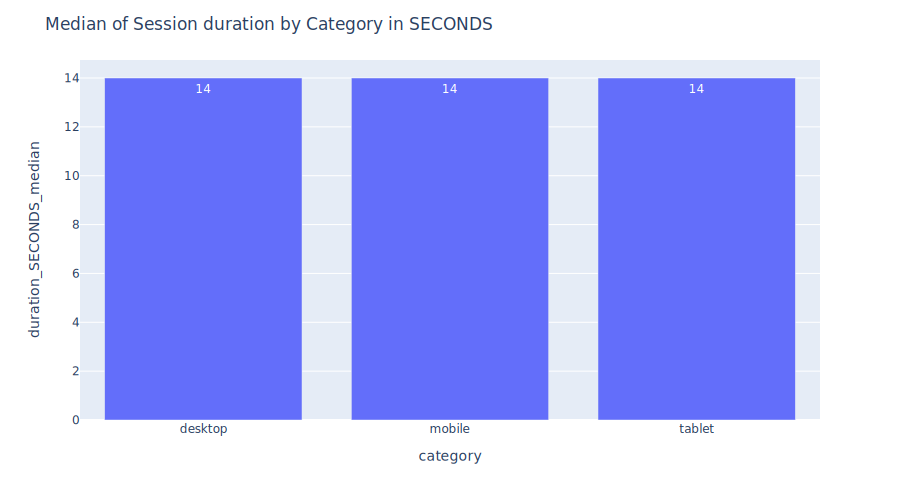

In [31]:
fig = px.bar(category, x='category', y='duration_SECONDS_median', 
             color_discrete_map=color_mapping, text='duration_SECONDS_median',)

fig.update_layout(title='Median of Session duration by Category in SECONDS', height=500,  width=900)

fig.show("svg")

Conclusions:

Median of session duration is the same for each category, and equals to median for entire dataset.

### Number of sessions per user

In [32]:
users = df.groupby(['user_pseudo_id']).agg({'session_id': 'count'})
users = users.reset_index()
users.head()

,user_pseudo_id,session_id
0,10001363.43609353,1
1,1000223163.8035208,1
2,1000299.7413851356,1
3,1000300.3223254236,2
4,10003031.460764544,1


In [33]:
sessions = users.groupby(['session_id']).agg({'user_pseudo_id': 'count'})
sessions = sessions.reset_index()
sessions = sessions.sort_values(by='user_pseudo_id', ascending=False)
sessions

,session_id,user_pseudo_id
0,1,224580
1,2,28611
2,3,7995
3,4,3634
4,5,2033
5,6,1152
6,7,765
7,8,515
8,9,332
9,10,267


In [34]:
users_total = sessions.user_pseudo_id.sum()
users_total

270154

In [35]:
sessions['perc_of_total'] = round((sessions['user_pseudo_id'] / users_total * 100), 2)
sessions

,session_id,user_pseudo_id,perc_of_total
0,1,224580,83.13
1,2,28611,10.59
2,3,7995,2.96
3,4,3634,1.35
4,5,2033,0.75
5,6,1152,0.43
6,7,765,0.28
7,8,515,0.19
8,9,332,0.12
9,10,267,0.10


In [36]:
sessions = sessions.rename(columns={'session_id': 'number_of_sessions', 'user_pseudo_id': 'number_of_users'})
sessions

,number_of_sessions,number_of_users,perc_of_total
0,1,224580,83.13
1,2,28611,10.59
2,3,7995,2.96
3,4,3634,1.35
4,5,2033,0.75
5,6,1152,0.43
6,7,765,0.28
7,8,515,0.19
8,9,332,0.12
9,10,267,0.10


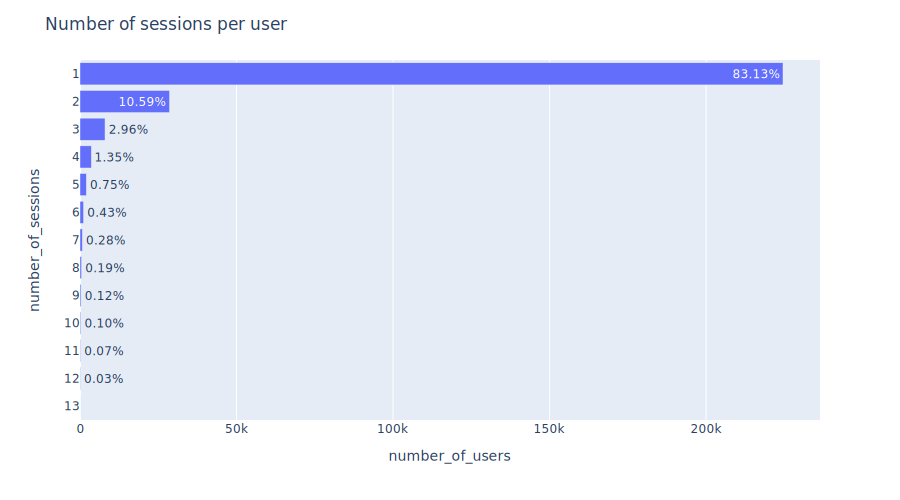

In [37]:
sessions['number_of_sessions'] = sessions['number_of_sessions'].astype(str)
sessions = sessions.sort_values(by='number_of_users')

percentage = sessions['perc_of_total'].apply(lambda x: f'{x/100:.2%}')

fig = px.bar(sessions, y='number_of_sessions', x='number_of_users', text=percentage)

fig.update_layout(title='Number of sessions per user', height=500,  width=900)

fig.show("svg")

Average number of sessions per user

In [38]:
avarage_sessions_per_user = round((df['session_id'].count() / df['user_pseudo_id'].nunique()), 2)
avarage_sessions_per_user

1.32

### Number of purchases per users

In [39]:
users_purchases = df.groupby(['user_pseudo_id']).agg({'purchase_flag': 'sum'})
users_purchases = users_purchases.reset_index()
users_purchases.head()

,user_pseudo_id,purchase_flag
0,10001363.43609353,0
1,1000223163.8035208,0
2,1000299.7413851356,0
3,1000300.3223254236,0
4,10003031.460764544,0


In [40]:
purchases = users_purchases.groupby(['purchase_flag']).agg({'user_pseudo_id': 'count'})
purchases = purchases.reset_index()
purchases = purchases.sort_values(by='user_pseudo_id', ascending=False)
purchases

,purchase_flag,user_pseudo_id
0,0,265735
1,1,4059
2,2,308
3,3,42
4,4,9
5,6,1


In [41]:
purchases['perc_of_total'] = round((purchases['user_pseudo_id'] / users_total * 100), 2)
purchases

,purchase_flag,user_pseudo_id,perc_of_total
0,0,265735,98.36
1,1,4059,1.50
2,2,308,0.11
3,3,42,0.02
4,4,9,0.00
5,6,1,0.00


In [42]:
purchases = purchases.rename(columns={'purchase_flag': 'number_of_purchases', 'user_pseudo_id': 'number_of_users'})
purchases

,number_of_purchases,number_of_users,perc_of_total
0,0,265735,98.36
1,1,4059,1.50
2,2,308,0.11
3,3,42,0.02
4,4,9,0.00
5,6,1,0.00


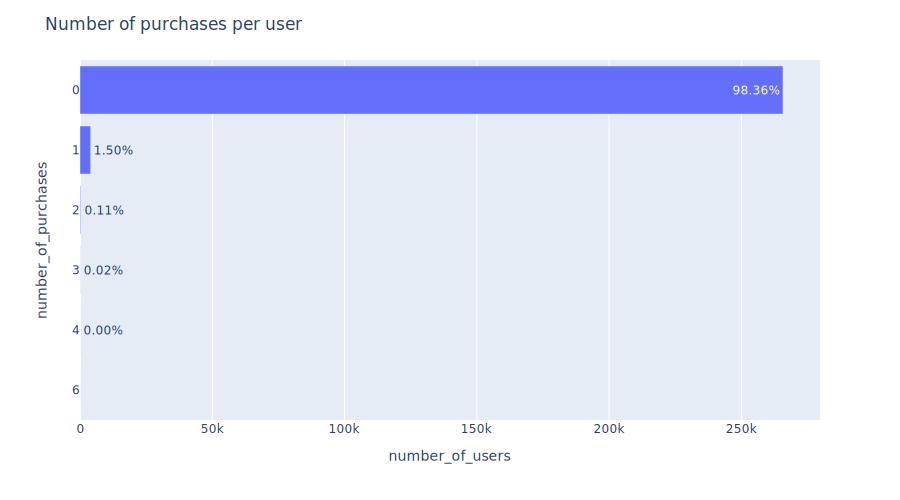

In [43]:
purchases['number_of_purchases'] = purchases['number_of_purchases'].astype(str)
purchases = purchases.sort_values(by='number_of_users')

percentage = purchases['perc_of_total'].apply(lambda x: f'{x/100:.2%}')

fig = px.bar(purchases, y='number_of_purchases', x='number_of_users', text=percentage)

fig.update_layout(title='Number of purchases per user', height=500,  width=900)

fig.show("svg")

### Conversion by Campaign

In [44]:
conversion = df.groupby('campaign').agg({'purchase_flag': 'sum', 'session_id': 'count'})
conversion['COV'] = round((conversion['purchase_flag'] / conversion['session_id'] * 100), 2)
conversion

,purchase_flag,session_id,COV
campaign,,,
BlackFriday_V1,2,9,22.22
BlackFriday_V2,10,25,40.00
Data Share Promo,3,1460,0.21
Holiday_V1,2,19,10.53
Holiday_V2,6,37,16.22
NewYear_V1,2,67,2.99
NewYear_V2,2,39,5.13
no_campaign,4816,353941,1.36


### Days of week conversion

In [45]:
no_campaign = df[df['campaign'] == 'no_campaign']
no_campaign = no_campaign.groupby(['campaign', 'weekday']).agg({'purchase_flag': 'sum', 'session_id': 'count'})
no_campaign['COV_rate'] = round((no_campaign['purchase_flag'] / no_campaign ['session_id'] * 100), 2)
no_campaign

purchase_flag  session_id  COV_rate
campaign    weekday                                       
no_campaign Friday               815       49997      1.63
            Monday               712       50932      1.40
            Saturday             514       39662      1.30
            Sunday               383       39990      0.96
            Thursday             707       54751      1.29
            Tuesday              858       59604      1.44
            Wednesday            827       59005      1.40

In [46]:
all_campaigns = df.groupby(['weekday']).agg({'duration_HH:MM:SS': 'median', 'purchase_flag': 'sum', 'session_id': 'count'})
all_campaigns['COV_rate'] = round((all_campaigns['purchase_flag'] / all_campaigns['session_id'] * 100), 2)
all_campaigns

,duration_HH:MM:SS,purchase_flag,session_id,COV_rate
weekday,,,,
Friday,0 days 00:00:14,819,50280,1.63
Monday,0 days 00:00:15,718,51174,1.40
Saturday,0 days 00:00:12,518,39881,1.30
Sunday,0 days 00:00:12,385,40111,0.96
Thursday,0 days 00:00:15,711,55043,1.29
Tuesday,0 days 00:00:15,860,59862,1.44
Wednesday,0 days 00:00:15,832,59246,1.40


Conclusions:

No campaign conversion rate per day of week trend is also true for all campaigns day of week trend.